In [5]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

%matplotlib inline
password = getpass.getpass()
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)


········


#### Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
#### Read the data into a Pandas dataframe.

#### Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.

In [7]:
sql_query = '''select f.title, 
r.rental_date, 
f.rental_duration,
SUBSTRING(r.rental_date, 1, 7) AS last_month, 
CASE WHEN SUBSTRING(r.rental_date, 1, 7) = '2006-02' THEN 1 ELSE 0 END AS Boolean_check,
f.length, 
f.rating, 
c.name


from rental r
left join inventory i
on r.inventory_id = i.inventory_id

left join film f
on i.film_id = f.film_id

left join film_category fc
on fc.film_id = f.film_id

left join category c
on c.category_id = fc.category_id

order by r.rental_date desc
;'''


df = pd.read_sql_query(blah, engine)
df

,title,rental_date,rental_duration,last_month,Boolean_check,length,rating,name
0,ACADEMY DINOSAUR,2022-02-05 12:46:06,6,2022-02,0,86,PG,Documentary
1,ZHIVAGO CORE,2006-02-14 15:16:03,6,2006-02,1,105,NC-17,Horror
2,WORLD LEATHERNECKS,2006-02-14 15:16:03,3,2006-02,1,171,PG-13,Horror
3,WOMEN DORADO,2006-02-14 15:16:03,4,2006-02,1,126,R,Action
4,WINDOW SIDE,2006-02-14 15:16:03,3,2006-02,1,85,R,Travel
...,...,...,...,...,...,...,...,...
16040,IDOLS SNATCHERS,2005-05-24 23:05:21,5,2005-05,0,84,NC-17,Children
16041,LOVE SUICIDES,2005-05-24 23:04:41,6,2005-05,0,181,R,Horror
16042,GRADUATE LORD,2005-05-24 23:03:39,7,2005-05,0,156,G,Children
16043,FREAKY POCUS,2005-05-24 22:54:33,7,2005-05,0,126,R,Music


In [8]:
df = df.drop(0) # just to drop unneccessary first row
df

,title,rental_date,rental_duration,last_month,Boolean_check,length,rating,name
1,ZHIVAGO CORE,2006-02-14 15:16:03,6,2006-02,1,105,NC-17,Horror
2,WORLD LEATHERNECKS,2006-02-14 15:16:03,3,2006-02,1,171,PG-13,Horror
3,WOMEN DORADO,2006-02-14 15:16:03,4,2006-02,1,126,R,Action
4,WINDOW SIDE,2006-02-14 15:16:03,3,2006-02,1,85,R,Travel
5,WILD APOLLO,2006-02-14 15:16:03,4,2006-02,1,181,R,New
...,...,...,...,...,...,...,...,...
16040,IDOLS SNATCHERS,2005-05-24 23:05:21,5,2005-05,0,84,NC-17,Children
16041,LOVE SUICIDES,2005-05-24 23:04:41,6,2005-05,0,181,R,Horror
16042,GRADUATE LORD,2005-05-24 23:03:39,7,2005-05,0,156,G,Children
16043,FREAKY POCUS,2005-05-24 22:54:33,7,2005-05,0,126,R,Music


In [9]:
df.shape

(16044, 8)

In [10]:
df.dtypes

title                      object
rental_date        datetime64[ns]
rental_duration             int64
last_month                 object
Boolean_check               int64
length                      int64
rating                     object
name                       object
dtype: object

In [11]:
df['Boolean_check'] = df['Boolean_check'].astype('bool')
df.dtypes

title                      object
rental_date        datetime64[ns]
rental_duration             int64
last_month                 object
Boolean_check                bool
length                      int64
rating                     object
name                       object
dtype: object

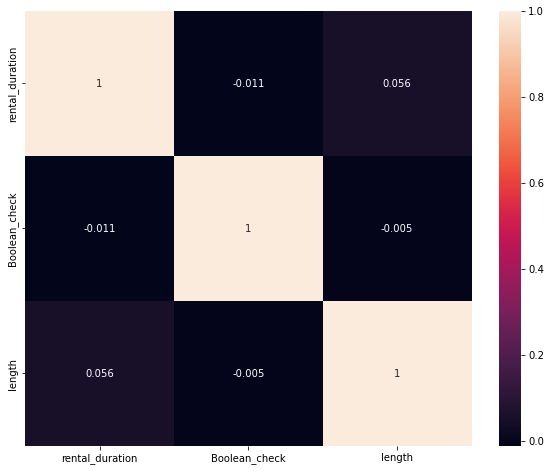

In [12]:
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

#### Normalizing numeric data

In [13]:
numeric = df.select_dtypes(include = np.number)

transformer = StandardScaler().fit(numeric)
numeric_normalized = transformer.transform(numeric)
num = pd.DataFrame(numeric_normalized)
num.columns = numeric.columns
num.head()

,rental_duration,length
0,0.759471,-0.248649
1,-1.380869,1.397192
2,-0.667422,0.275028
3,-1.380869,-0.747388
4,-0.667422,1.646561


In [14]:
numeric.isna().sum()

rental_duration    0
length             0
dtype: int64

#### Categorical data

In [15]:
cat = df.select_dtypes(include = object)
cat.head()

,title,last_month,rating,name
1,ZHIVAGO CORE,2006-02,NC-17,Horror
2,WORLD LEATHERNECKS,2006-02,PG-13,Horror
3,WOMEN DORADO,2006-02,R,Action
4,WINDOW SIDE,2006-02,R,Travel
5,WILD APOLLO,2006-02,R,New


In [16]:
cat.isna().sum()

title         0
last_month    0
rating        0
name          0
dtype: int64

In [17]:
cat = cat.drop(['title', 'last_month'], axis =1)
categorical = pd.get_dummies(cat, columns=[ 'rating','name'])
categorical

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Action,name_Animation,name_Children,name_Classics,name_Comedy,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16041,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16042,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16043,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Create a logistic regression model to predict this variable from the cleaned data.

In [18]:
y = df['Boolean_check'] # Target appart
X = np.concatenate((num, categorical), axis=1) # Numerical and dummies from categoricals

In [19]:
# We separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [20]:
# We traing the training dataset using Logistic Regression (multiclass classification)
classification = LogisticRegression(random_state=0, multi_class='auto').fit(X_train, y_train)

In [21]:
# We predict on the testing dataset
predictions = classification.predict(X_test)

#### check how well the model performs

In [22]:
pd.Series(predictions).value_counts()

False    4814
dtype: int64

In [23]:
y_test.value_counts()

False    4752
True       62
Name: Boolean_check, dtype: int64

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[4752,    0],
       [  62,    0]])

<AxesSubplot:>

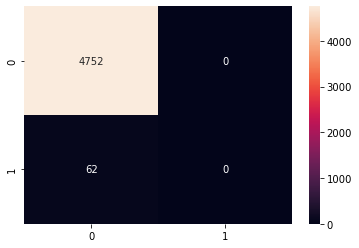

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True,fmt='g')


In [26]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.99



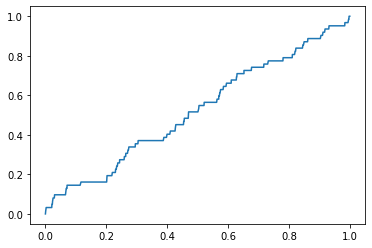

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)